# First Test

In [1]:
import os
import sys

import numpy as np
import pandas as pd
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

note_dir = os.getcwd()
root_dir = os.path.dirname(note_dir)
sys.path.append(root_dir)

import bonsai
from bonsai.base import *

In [2]:
def plot_corr(corr):
    fig = plt.figure(figsize=((10,10))) # slightly larger
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='seismic')
    fig.colorbar(cax)
    
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.4f}'.format(z), ha='center', va='center', color='w')
    return 

In [3]:
def summarize_dataset(df, samples=1000, random_state=997, replace=False):
    """
    This function plots a grid of plots that give some insights into pairwise relationships between
    the attributes in the dataset.
    
    Explicit correlations or special distributions should be very visible here.
    """
    
    df_subsample = df.sample(n=samples, replace=False, random_state=random_state)
    
    sns.set(style="ticks", color_codes=True)
    g = sns.PairGrid(df_subsample) # slice every 10 otherwise a bit slow
    g = g.map_diag(plt.hist) # histograms on the diagonal
    g = g.map_lower(sns.kdeplot, cmap="Blues_d") # density plot on the lower plots
    g = g.map_upper(plt.scatter) # scatter plots on the upper plots
    return

## Data

In [4]:
# Synthetic DataSet using sklearn
X, y = make_friedman1(n_samples=10**5, n_features=5, noise=4.0) 
n, m = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
df = pd.DataFrame(X)
df = df.assign(y=y)
df.head()

,0,1,2,3,4,y
0,0.511622,0.867534,0.740695,0.365937,0.286077,20.122470
1,0.896073,0.167271,0.828719,0.617285,0.785871,24.586417
2,0.987545,0.548902,0.402765,0.305214,0.460607,15.841110
3,0.661780,0.035307,0.458410,0.062542,0.116113,-0.817720
4,0.606436,0.523485,0.651928,0.276019,0.773375,16.663088


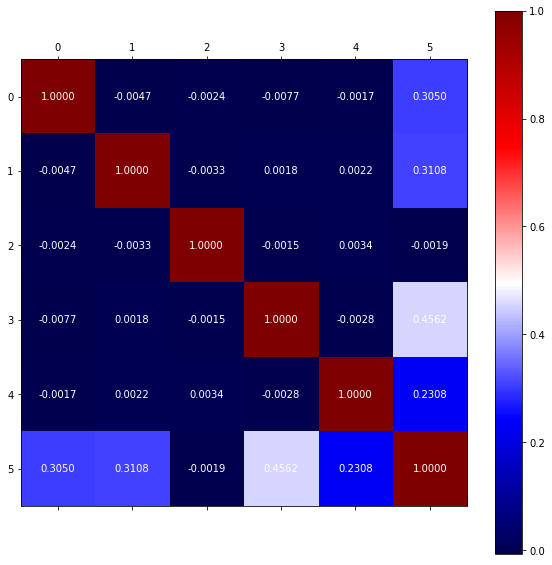

In [6]:
corr = df.corr().values
plot_corr(corr)

## Build Tree

Build trees and derive randomizations and see how their result behaves.

In [7]:
# Initialize
model = RegTree(max_depth=10)

# Fit
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

rmse_original = np.sqrt(np.mean((y_test - y_pred)**2))
rmse_original

4.4517052468852185

7.9093176770850295


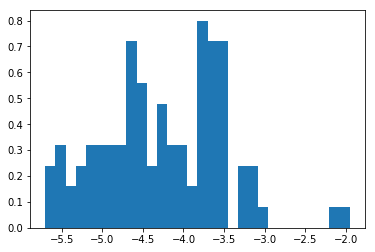

In [8]:
derived_trees = [model.randomize_tree(kind="swap") for _ in range(100)]
derived_pred = [m.predict(X_test) for m in derived_trees]
derived_rmse = [np.sqrt(np.mean((y_test - y_pred)**2)) for y_pred in derived_pred]
delta_rmse = [rmse_original-d for d in derived_rmse]

mean_pred = np.mean(derived_pred, axis=0)
rmse_mean = np.sqrt(np.mean((y_test - mean_pred)**2))
print(rmse_mean)

plt.hist(delta_rmse, 30, density=True)
plt.show()

In [9]:
derived_trees = [model.randomize_tree(kind="tunnel") for _ in range(100)]
derived_pred = [m.predict(X_test) for m in derived_trees]
derived_rmse = [np.sqrt(np.mean((y_test - y_pred)**2)) for y_pred in derived_pred]
delta_rmse = [rmse_original-d for d in derived_rmse]

mean_pred = np.mean(derived_pred, axis=0)
rmse_mean = np.sqrt(np.mean((y_test - mean_pred)**2))
print(rmse_mean)

5.320425125119175


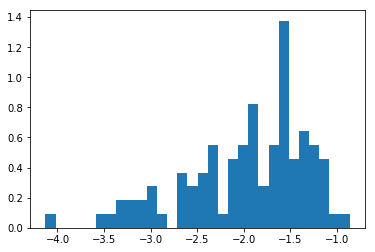

In [10]:
plt.hist(delta_rmse, 30, density=True)
plt.show()